In [1]:
# -*- coding: utf-8 -*-
"""
@date: 18 january 2019
@author: nasreedine belguith 
@mail: nasreedine.belguith@gmail.com
 

    """
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

/home/tcb/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [2]:
#import the iris dataset 
iris = datasets.load_iris()    

In [3]:
# the predictor is X 
#y is the binary variable that we aim to predict 
X = iris.data[:, :2]
y = (iris.target != 0) * 1

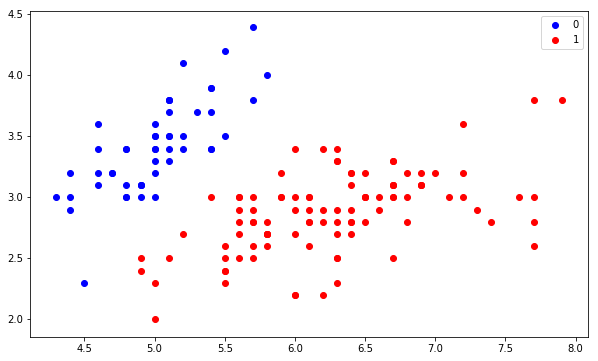

In [4]:
#plot the clusters (two clusters)
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [5]:

    def __add_intercept(X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

In [6]:
#sigmoid function
def __sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
#the loss function
def __loss(h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [42]:
#compute parameter matrix and the loss using the descent gradient
def fit(X, y, fit_intercept, num_iter, lr, verbose):
    if fit_intercept:
        X = __add_intercept(X)
        
        # weights initialization to zeros 
    theta = np.zeros(X.shape[1])
    
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = __sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= lr * gradient
        #print(theta) 
        z = np.dot(X, theta)
        h = __sigmoid(z)
        loss = __loss(h, y)
    print(f'loss: {loss} \t')
    return theta
               

In [43]:
#compute theta
#the number of iterations is so high 
theta = fit(X,y,True,1000000,0.1,False)
print(theta)

/home/tcb/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/tcb/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


loss: nan 	
[-41.48293966  17.84403944 -17.4829172 ]


In [45]:
 #predict the probability
    def predict_probs(fit_intercept, X):
        if fit_intercept:
            X = __add_intercept(X)
            return __sigmoid(np.dot(X, theta))

In [23]:
#print(predict_probs(True, X))

In [46]:
#predict the output Y
def predict(X):
    return predict_probs(True,X).round()

In [47]:
predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
%time fit(X, y,True,1000000,0.1,True)

/home/tcb/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/tcb/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


loss: nan 	
CPU times: user 3min 25s, sys: 72 ms, total: 3min 25s
Wall time: 1min 49s


array([-41.48293966,  17.84403944, -17.4829172 ])

In [49]:
preds = predict(X)
(preds == y).mean()

1.0

In [50]:
theta

array([-41.48293966,  17.84403944, -17.4829172 ])

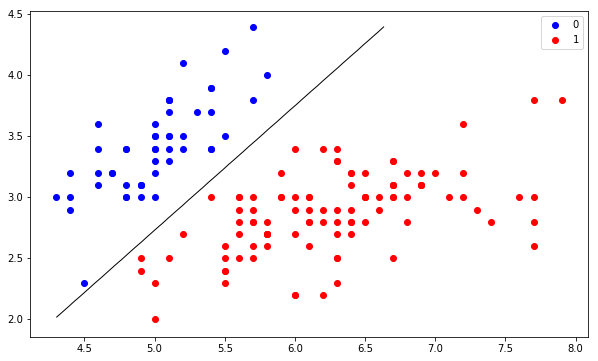

In [54]:
#plot the separation line between the two clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
X1, X2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[X1.ravel(), X2.ravel()]
probs = predict_probs(True,grid).reshape(X1.shape)
plt.contour(X1, X2, probs, [0.5], linewidths=1, colors='black');